<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_One/blob/master/DE_OPTIM_ANN_stat_mod_Insight_DIVERSIDADE_3x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [0]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Schwefel'
Fun=Function.Schwefel

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [0]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [0]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [11]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS


  ''' DIo=1e99
  
  CRo=crossp;Fo=mut;
  Fitness = np.asarray([Fun(ind) for ind in X])
  XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
  nrow,ncol=X.shape

  QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
  MAT_INDo[0,5]=nrow  # VALOR NP
  MAT_INDo[0,6]=Fo    # VALOR Fo   
  MAT_INDo[0,7]=CRo   # VALOR CRo
  
  MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                       syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                       X_min_CR,Fc,fields,Fun)
  
  DIo=np.copy(MAT_INDo[0,0])
  pd.set_option('display.max_columns', 30)  
  MAT_INDo[0,15]=Fo    # VALOR Fo   
  MAT_INDo[0,16]=CRo   # VALOR CRo
  MAT=[]
  for loop in range(ITE):
    X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
  
    MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
    
    BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
    MAT.append(MAT_IND.ravel())
    
    MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
    MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
    mut=MAT_IND[0,15]
    crossp=MAT_IND[0,16]
'''

''' 
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
df  = pd.DataFrame(MAT, columns=NOMES)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
'''


" \nNOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',\n           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',\n           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',\n           'F','CR']\ndf  = pd.DataFrame(MAT, columns=NOMES)\npd.set_option('display.max_columns', 30)\npd.set_option('display.max_rows', 30)\n"

In [0]:
# print('FOBEST: ',FOBEST)  # FOBEST:  5.233917411171049

In [0]:
# print(df)

In [0]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
  
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

In [0]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [16]:
pd.set_option('display.max_columns', 30)  
print(df)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         903.809412     1.019579      0.01         0.0      0.0  100.0   
1         909.533378     1.026036      0.02         1.0      2.0  100.0   
2         912.339304     1.029202      0.03         1.0      2.0  100.0   
3         915.314655     1.032558      0.04         0.0      0.0  100.0   
4         922.742109     1.040937      0.05         1.0      2.0  100.0   
..               ...          ...       ...         ...      ...    ...   
95        411.907409     0.464669      0.96         0.0      0.0  100.0   
96        406.648888     0.458737      0.97         1.0      2.0  100.0   
97        371.655348     0.419261      0.98         0.0      0.0  100.0   
98        371.905325     0.419543      0.99         1.0      2.0  100.0   
99        365.431502     0.412240      1.00         2.0      2.0  100.0   

          Fo       CRo         fmin         fmax  AD_fmin  AD_fmax  \
0   0.500000  0.500000  2655.

Text(0, 0.5, 'CR')

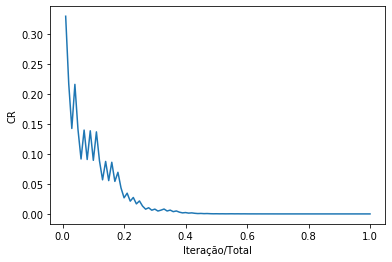

In [17]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

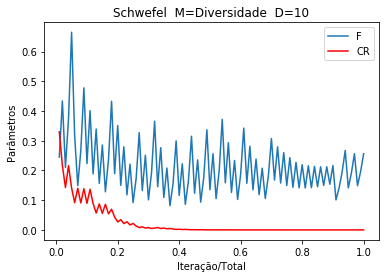

In [18]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Schwefel_Diversidade_D=10')

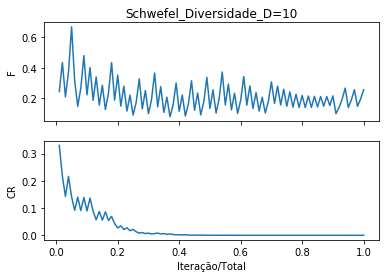

In [19]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [20]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -500 / 500 _ Schwefel
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  5.716409515279793
MIN __: 2.950735089522823
MAX__:  16.356597352766585
STD __: 3.817466637618778
Tempo Médio= 3.222 segundos ---
10 Rodadas

BEST:  [420.73322995 418.02338517 421.18300778 420.33958327 422.37420412
 423.07045679 420.35658817 421.61753565 419.97172754 418.50944879
   2.95073509]
